# Regularization
A penulty is appied on loss function of the regression on top of squared error

In [28]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd
df = pd.read_csv('Cars93 (1).csv', na_values=['', 'Na'],keep_default_na = False)
df

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30,15,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28,14,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,...,6,193,106,70,37,31,17,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27,13,3640,non-USA,BMW 535i
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,89,Volkswagen,Eurovan,Van,16.6,19.7,22.7,17,21,None,...,7,187,115,72,38,34,NA,3960,non-USA,Volkswagen Eurovan
89,90,Volkswagen,Passat,Compact,17.6,20.0,22.4,21,30,None,...,5,180,103,67,35,31.5,14,2985,non-USA,Volkswagen Passat
90,91,Volkswagen,Corrado,Sporty,22.9,23.3,23.7,18,25,None,...,4,159,97,66,36,26,15,2810,non-USA,Volkswagen Corrado
91,92,Volvo,240,Compact,21.8,22.7,23.5,21,28,Driver only,...,5,190,104,67,37,29.5,14,2985,non-USA,Volvo 240


In [3]:
df.index


RangeIndex(start=0, stop=93, step=1)

In [4]:
df.shape

(93, 28)

In [32]:
df.isna().sum()

id                    0
Manufacturer          0
Model                 0
Type                  0
Min.Price             0
Price                 0
Max.Price             0
MPG.city              0
MPG.highway           0
AirBags               4
DriveTrain            0
Cylinders             0
EngineSize            0
Horsepower            0
RPM                   0
Rev.per.mile          0
Man.trans.avail       0
Fuel.tank.capacity    0
Passengers            0
Length                0
Wheelbase             0
Width                 0
Turn.circle           0
Rear.seat.room        0
Luggage.room          0
Weight                0
Origin                0
Make                  0
dtype: int64

In [5]:
df.duplicated().sum()


0

 # Step 3 : Seperate X and Y(weight)

In [6]:
X = df.drop(columns = ['id', 'Weight'])
Y = df[['Weight']]

In [7]:
X.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,...,13.2,5,177,102,68,37,26.5,11,non-USA,Acura Integra
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,18.0,5,195,115,71,38,30,15,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,16.9,5,180,102,67,37,28,14,non-USA,Audi 90
3,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,Front,...,21.1,6,193,106,70,37,31,17,non-USA,Audi 100
4,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,21.1,4,186,109,69,39,27,13,non-USA,BMW 535i


In [36]:
Y.head()

,Weight
0,2705
1,3560
2,3375
3,3405
4,3640


# Step 4: Apply Preprocessing on X


In [8]:
cat = list (X.columns[X.dtypes=='object'])
con= list (X.columns[X.dtypes!='object'])


In [9]:
cat

['Manufacturer',
 'Model',
 'Type',
 'AirBags',
 'DriveTrain',
 'Cylinders',
 'Man.trans.avail',
 'Rear.seat.room',
 'Luggage.room',
 'Origin',
 'Make']

In [10]:
con

['Min.Price',
 'Price',
 'Max.Price',
 'MPG.city',
 'MPG.highway',
 'EngineSize',
 'Horsepower',
 'RPM',
 'Rev.per.mile',
 'Fuel.tank.capacity',
 'Passengers',
 'Length',
 'Wheelbase',
 'Width',
 'Turn.circle']

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

In [12]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy= 'mean')), 
                           ('scaler', StandardScaler())])

In [13]:
cat_pipe = Pipeline(steps = [('impute', SimpleImputer(strategy='most_frequent' )),
                             ('ohe', OneHotEncoder(handle_unknown='ignore',
                                                   sparse_output=False))])

In [14]:
pre = ColumnTransformer([('num', num_pipe, con),
                         ('cat', cat_pipe, cat)]).set_output(transform='pandas')

In [15]:
X_pre = pre.fit_transform(X)
X_pre.head()

,num__Min.Price,num__Price,num__Max.Price,num__MPG.city,num__MPG.highway,num__EngineSize,num__Horsepower,num__RPM,num__Rev.per.mile,num__Fuel.tank.capacity,...,cat__Make_Toyota Camry,cat__Make_Toyota Celica,cat__Make_Toyota Previa,cat__Make_Toyota Tercel,cat__Make_Volkswagen Corrado,cat__Make_Volkswagen Eurovan,cat__Make_Volkswagen Fox,cat__Make_Volkswagen Passat,cat__Make_Volvo 240,cat__Make_Volvo 850
0,-0.485787,-0.375720,-0.282465,0.471312,0.360925,-0.841022,-0.073484,1.717489,1.129530,-1.062184,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.388017,1.497844,1.531409,-0.781032,-0.770514,0.515869,1.078322,0.369586,0.005661,0.409445,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.008658,0.998227,0.948052,-0.423219,-0.581941,0.128186,0.540813,0.369586,-0.105713,0.072197,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.571949,1.893374,2.069191,-0.602126,-0.581941,0.128186,0.540813,0.369586,0.410659,1.359872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.755752,1.091905,1.303535,-0.065407,0.172352,0.806631,1.231897,0.706562,0.430909,1.359872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Step 5 - Apply train Test Split

In [17]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X_pre, Y, test_size=0.2, random_state = 10)

In [18]:
Xtrain.head()

,num__Min.Price,num__Price,num__Max.Price,num__MPG.city,num__MPG.highway,num__EngineSize,num__Horsepower,num__RPM,num__Rev.per.mile,num__Fuel.tank.capacity,...,cat__Make_Toyota Camry,cat__Make_Toyota Celica,cat__Make_Toyota Previa,cat__Make_Toyota Tercel,cat__Make_Volkswagen Corrado,cat__Make_Volkswagen Eurovan,cat__Make_Volkswagen Fox,cat__Make_Volkswagen Passat,cat__Make_Volvo 240,cat__Make_Volvo 850
42,-0.382326,-0.209181,-0.063707,0.292406,0.360925,-0.453339,-0.073484,0.538074,0.562533,0.102856,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53,-0.715702,-0.823294,-0.874937,1.008032,1.303790,-0.841022,-0.783765,0.369586,-0.227212,-0.663618,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21,1.422504,1.039862,0.692834,-0.423219,-0.581941,0.612789,0.060893,-0.809828,-1.108083,-0.203734,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.318914,0.134306,-0.018132,-0.602126,-0.204794,1.097393,0.502419,-0.809828,-1.543455,0.409445,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,-0.267368,-0.406946,-0.501224,-0.244313,-0.393368,-0.162577,-0.841356,-0.809828,0.268910,-0.203734,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
Ytrain.head()

,Weight
42,3040
53,2440
21,3570
6,3470
26,3080


In [20]:
Xtest.head()

,num__Min.Price,num__Price,num__Max.Price,num__MPG.city,num__MPG.highway,num__EngineSize,num__Horsepower,num__RPM,num__Rev.per.mile,num__Fuel.tank.capacity,...,cat__Make_Toyota Camry,cat__Make_Toyota Celica,cat__Make_Toyota Previa,cat__Make_Toyota Tercel,cat__Make_Volkswagen Corrado,cat__Make_Volkswagen Eurovan,cat__Make_Volkswagen Fox,cat__Make_Volkswagen Passat,cat__Make_Volvo 240,cat__Make_Volvo 850
34,-0.497283,-0.573485,-0.610603,0.292406,0.172352,-0.647181,-0.553404,0.369586,0.015786,-0.357028,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
90,0.663786,0.394523,0.164167,-0.781032,-0.770514,0.128186,0.655993,0.875050,0.106911,0.562740,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.571949,1.893374,2.069191,-0.602126,-0.581941,0.128186,0.540813,0.369586,0.410659,1.359872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35,-0.301856,0.040627,0.310006,-1.317751,-1.713379,0.322027,0.022499,-0.809828,-0.510711,1.329213,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,0.146478,-0.115503,-0.318925,-0.423219,-0.204794,0.612789,0.176074,0.032611,-0.692960,0.409445,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
Ytest.head()

,Weight
34,2710
90,2810
3,3405
35,3735
19,3515


In [22]:
Xtrain.shape

(74, 297)

In [23]:
Xtest.shape

(19, 297)

# Step 6: Bluid different models
1. Linear Regrassion

In [24]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(Xtrain, Ytrain)

LinearRegression()

In [25]:
model1.score(Xtrain, Ytrain)

1.0

In [26]:
model1.score(Xtest, Ytest)

0.8778147281788748

# Model 2. Ridge

In [27]:
from sklearn.linear_model import Ridge
model2 = Ridge(alpha=2)
model2.fit(Xtrain, Ytrain)


Ridge(alpha=2)

In [28]:
model2.score(Xtrain, Ytrain)

0.9966156809676723

In [29]:
model2.score(Xtest, Ytest)

0.8919791866432737

## Tuning alpha value with Grid search Cross Validation
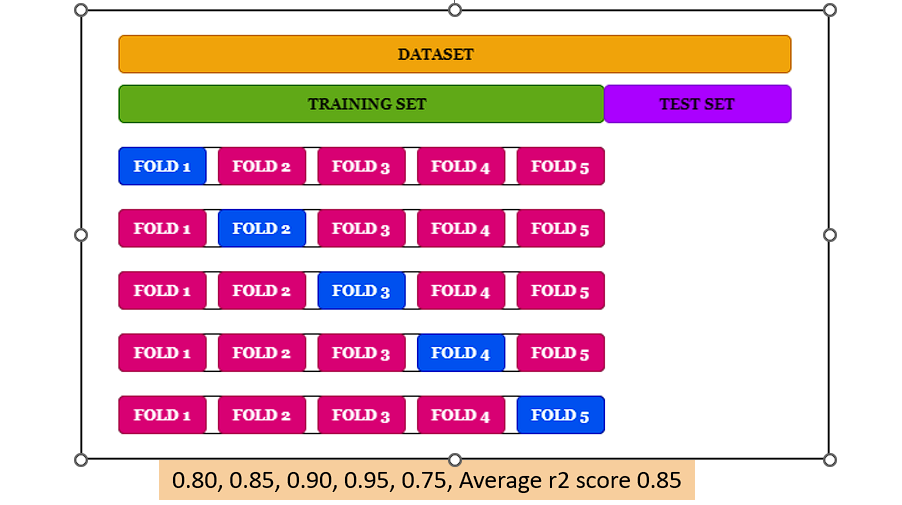

In [30]:
from sklearn.model_selection import cross_val_score
r2_scores_ridge = cross_val_score(model2, Xtrain, Ytrain, cv=5, scoring = 'r2')
r2_scores_ridge

array([0.96702596, 0.96704847, 0.88549263, 0.95481955, 0.91883641])

In [31]:
r2_scores_ridge.mean()

0.9386446027142498

In [32]:
mae_scores_ridge= cross_val_score(model2, Xtrain, Ytrain, cv=5, scoring = 'neg_mean_absolute_error')

In [34]:
mae_scores_ridge

array([ -84.5177118 ,  -93.67072886, -159.5885668 , -102.2811496 ,
       -115.89609655])

In [35]:
mae_scores_ridge.mean()

-111.19085072253066

In [36]:
r2_scores_linear = cross_val_score(model1, Xtrain, Ytrain, cv=5, scoring = 'r2')
r2_scores_linear

array([0.96346355, 0.96338451, 0.87823124, 0.95691029, 0.90913943])

In [37]:
r2_scores_linear.mean()

0.9342258025890287

## Generating alpha values from 0 to 100

In [40]:
import numpy as np
alphas = np.arange(start=0.1, stop=100, step= 0.1)
alphas

array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
        7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
        8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
       10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9, 11. ,
       11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. , 12.1,
       12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1, 13.2,
       13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2, 14.3,
       14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15. , 15

In [42]:
params = {'alpha': alphas}
params

{'alpha': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
         1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
         2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
         3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
         4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
         5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
         6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
         7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
         8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
        10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9, 11. ,
        11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. , 12.1,
        12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1, 13.2,
        13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2, 14.3,
        14.4, 14.5, 14.6, 14.

In [43]:
from sklearn.model_selection import GridSearchCV
model_ridge = Ridge()
gscv_ridge= GridSearchCV(model_ridge, param_grid = params, cv=5,scoring = 'r2')
gscv_ridge.fit(Xtrain, Ytrain)


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7....
       92.5, 92.6, 92.7, 92.8, 92.9, 93. , 93.1, 93.2, 93.3, 93.4, 93.5,
       93.6, 93.7, 93.8, 93.9, 94. , 94.1, 94.2, 94.3, 94.4, 94.5, 94.6,
       94.7, 94.8, 94.9, 95. , 95.1, 95.2, 95.3, 95.4, 95.5, 95.6, 95.7,
       95.8, 95.9, 96. , 96.1, 96.2, 96.3, 96.4, 96.5, 96.6, 96.7, 96.8,
       96.9, 97. , 97.1, 97.2, 97.3, 97.4, 97.5, 97.6, 97.7, 97.8, 97.9,
       98. , 98.1, 98.2, 98.3, 98.4, 98.5, 98.6, 98.7, 98.8, 98.9, 99. ,
       99.1, 99.2, 99.3, 99.4, 99.5, 99.6, 99.7, 99.8, 99.9])},
             scoring='r2')

In [44]:
gscv_ridge.best_params_

{'alpha': 7.5}

In [45]:
gscv_ridge.best_score_

0.9407105055402581

In [46]:
best_ridge = gscv_ridge.best_estimator_
best_ridge

Ridge(alpha=7.5)

In [48]:
best_ridge.score(Xtrain, Ytrain)

0.9862409313133543

In [49]:
best_ridge.score(Xtest, Ytest)

0.9099360561990405

In [52]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, \
                            mean_absolute_percentage_error, r2_score

In [53]:
def evaluate_model(model, X, Y):
    Ypred = model.predict(X)
    mse = mean_squared_error(Y, Ypred)
    rmse = mse**(1/2)
    mae = mean_absolute_error(Y, Ypred)
    mape = mean_absolute_percentage_error(Y, Ypred)
    r2 = r2_score(Y, Ypred)
    print(f'Mean Squared Error : {mse:.2f}')
    print(f'Root mean Squared Error: {rmse:.2f}')
    print(f'Mean Absolute Error: {mae:.2f}')
    print(f'Mean absolute percentage Error: {mape:.2f}')
    print(f'R2 Score: {r2 :.4f}')

In [54]:
evaluate_model(best_ridge, Xtrain, Ytrain)

Mean Squared Error : 5117.20
Root mean Squared Error: 71.53
Mean Absolute Error: 53.59
Mean absolute percentage Error: 0.02
R2 Score: 0.9862


In [55]:
evaluate_model(best_ridge, Xtest, Ytest)

Mean Squared Error : 20925.00
Root mean Squared Error: 144.65
Mean Absolute Error: 117.80
Mean absolute percentage Error: 0.04
R2 Score: 0.9099


# Model 3 -Lasso

In [56]:
from sklearn.linear_model import Lasso
model3 = Lasso(alpha =1)
model3.fit(Xtrain, Ytrain)

Lasso(alpha=1)

In [57]:
model3.score(Xtrain, Ytrain)

0.9948712090420089

In [58]:
model3.score(Xtest, Ytest)

0.8670894734084547

In [59]:
params

{'alpha': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
         1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
         2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
         3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
         4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
         5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
         6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
         7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
         8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
        10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9, 11. ,
        11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. , 12.1,
        12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1, 13.2,
        13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2, 14.3,
        14.4, 14.5, 14.6, 14.

In [60]:
model_lasso = Lasso()
gscv_lasso = GridSearchCV(model_lasso, param_grid=params, cv=5, scoring = 'r2')
gscv_lasso.fit(Xtrain, Ytrain )

d:\ML_work\repository\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.284e+04, tolerance: 2.205e+03
  model = cd_fast.enet_coordinate_descent(
d:\ML_work\repository\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.057e+04, tolerance: 2.059e+03
  model = cd_fast.enet_coordinate_descent(
d:\ML_work\repository\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.924e+03, to

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7....
       92.5, 92.6, 92.7, 92.8, 92.9, 93. , 93.1, 93.2, 93.3, 93.4, 93.5,
       93.6, 93.7, 93.8, 93.9, 94. , 94.1, 94.2, 94.3, 94.4, 94.5, 94.6,
       94.7, 94.8, 94.9, 95. , 95.1, 95.2, 95.3, 95.4, 95.5, 95.6, 95.7,
       95.8, 95.9, 96. , 96.1, 96.2, 96.3, 96.4, 96.5, 96.6, 96.7, 96.8,
       96.9, 97. , 97.1, 97.2, 97.3, 97.4, 97.5, 97.6, 97.7, 97.8, 97.9,
       98. , 98.1, 98.2, 98.3, 98.4, 98.5, 98.6, 98.7, 98.8, 98.9, 99. ,
       99.1, 99.2, 99.3, 99.4, 99.5, 99.6, 99.7, 99.8, 99.9])},
             scoring='r2')

In [61]:
gscv_lasso.best_params_

{'alpha': 5.3}

In [62]:
gscv_lasso.best_score_

0.9413310185651762

In [64]:
best_lasso = gscv_lasso.best_estimator_
best_lasso

Lasso(alpha=5.3)

In [65]:
best_lasso.score(Xtrain, Ytrain)

0.9724465167260378

In [66]:
best_lasso.score(Xtest, Ytest)

0.8824802824832852

In [68]:
evaluate_model(best_lasso, Xtrain, Ytrain)

Mean Squared Error : 10247.55
Root mean Squared Error: 101.23
Mean Absolute Error: 80.82
Mean absolute percentage Error: 0.03
R2 Score: 0.9724


In [69]:
evaluate_model(best_lasso, Xtest, Ytest)

Mean Squared Error : 27303.93
Root mean Squared Error: 165.24
Mean Absolute Error: 125.00
Mean absolute percentage Error: 0.04
R2 Score: 0.8825


# After Comapring above Ridge model has higest test score of 0.9099 when compared with Lasso

Choose ridge model for out of samplr prediction

In [70]:
best_ridge

Ridge(alpha=7.5)

In [71]:
Xnew = pd.read_csv('sample.csv', na_values=['', 'NA'], keep_default_na = False)
Xnew

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Origin,Make
0,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,Front,...,15.0,6,190,106,65,37,31.0,17.0,non-USA,Audi 100
1,Pontiac,Sunbird,Compact,9.4,11.1,12.8,23,31,None,Front,...,15.2,5,181,101,66,39,25.0,13.0,USA,Pontiac Sunbird
2,Chevrolet,Lumina,Midsize,13.4,15.9,18.4,21,29,None,Front,...,16.5,6,198,108,71,40,28.5,16.0,USA,Chevrolet Lumina
3,Mazda,RX-7,Sporty,32.5,32.5,32.5,17,25,Driver only,Rear,...,20.0,2,169,96,69,37,NaN,NaN,non-USA,Mazda RX-7
4,Volkswagen,Fox,Small,8.7,9.1,9.5,25,33,None,Front,...,12.4,4,163,93,63,34,26.0,10.0,non-USA,Volkswagen Fox


In [72]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['Min.Price', 'Price', 'Max.Price', 'MPG.city',
                                  'MPG.highway', 'EngineSize', 'Horsepower',
                                  'RPM', 'Rev.per.mile', 'Fuel.tank.capacity',
                                  'Passengers', 'Length', 'Wheelbase', 'Width',
                                  'Turn.circle']),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Manufacturer', 'Model', 'Type', 'AirBags',
                                  'DriveTrain', 'Cylinders', 'Man.trans.avail',
                                  'Rear.seat.room', 'Luggage.room', 'Origin',
                                  'Make'])])

In [73]:
Xnew_pre = pre.transform(Xnew)
Xnew_pre

,num__Min.Price,num__Price,num__Max.Price,num__MPG.city,num__MPG.highway,num__EngineSize,num__Horsepower,num__RPM,num__Rev.per.mile,num__Fuel.tank.capacity,...,cat__Make_Toyota Camry,cat__Make_Toyota Celica,cat__Make_Toyota Previa,cat__Make_Toyota Tercel,cat__Make_Volkswagen Corrado,cat__Make_Volkswagen Eurovan,cat__Make_Volkswagen Fox,cat__Make_Volkswagen Passat,cat__Make_Volvo 240,cat__Make_Volvo 850
0,1.571949,1.893374,2.069191,-0.602126,-0.581941,0.128186,0.540813,0.369586,0.410659,-0.510323,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.888138,-0.875337,-0.829362,0.113500,0.360925,-0.647181,-0.649388,-0.135877,0.673908,-0.449005,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.428309,-0.375720,-0.318925,-0.244313,-0.016221,-0.453339,-0.649388,-0.135877,0.532158,-0.050439,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.767376,1.352122,0.966282,-0.959938,-0.770514,-1.325626,2.134145,2.054464,-0.014589,1.022624,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.968608,-1.083511,-1.130155,0.471312,0.738071,-0.841022,-1.206095,0.369586,0.441034,-1.307455,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [74]:
df_final = Xnew[['Manufacturer', 'Model']]
df_final

,Manufacturer,Model
0,Audi,100
1,Pontiac,Sunbird
2,Chevrolet,Lumina
3,Mazda,RX-7
4,Volkswagen,Fox


In [76]:
preds = best_ridge.predict(Xnew_pre)
preds

array([[3313.71684701],
       [2673.01548754],
       [3073.30458116],
       [3210.54347821],
       [2260.96958195]])

In [77]:
df_final['Weight_pred'] = preds


C:\Users\Payal\AppData\Local\Temp\ipykernel_9808\3284803444.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Weight_pred'] = preds


In [78]:
df_final

,Manufacturer,Model,Weight_pred
0,Audi,100,3313.716847
1,Pontiac,Sunbird,2673.015488
2,Chevrolet,Lumina,3073.304581
3,Mazda,RX-7,3210.543478
4,Volkswagen,Fox,2260.969582


In [79]:
df_final.to_csv('RidgeResults.csv', index=False)